In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import urllib.parse
from sqlalchemy import create_engine
from sqlalchemy import text

# Load your dataset
params = urllib.parse.quote_plus(r'Driver={ODBC Driver 18 for SQL Server};Server=tcp:adaptive-learning-server.database.windows.net,1433;Database=adaptive_learning_db;Uid=superadmin;Pwd=Poorpassword@2024;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;')
conn_str = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine_azure = create_engine(conn_str,echo=True)

connection = engine_azure.connect()
print("Connection successful !!!!")

# Perform a query to fetch effectivness
query = text(
    "SELECT * "
    "FROM Import_extra_intiger;"
)

result = connection.execute(query)

# Fetch all the rows and convert them to a Pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=result.keys())

print("!!! df retrieved values:", df)

# Assuming your data is stored in a variable named 'df'
# Replace 'effectiveness' with the target variable you want to predict
X = df.drop('effectiveness', axis=1)
y = df['effectiveness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier (you can choose a different algorithm based on your needs)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


2024-01-28 14:38:59,789 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2024-01-28 14:38:59,789 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-28 14:38:59,802 INFO sqlalchemy.engine.Engine SELECT schema_name()
2024-01-28 14:38:59,802 INFO sqlalchemy.engine.Engine [generated in 0.00059s] ()
2024-01-28 14:38:59,836 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2024-01-28 14:38:59,836 INFO sqlalchemy.engine.Engine [generated in 0.00055s] ()
2024-01-28 14:38:59,848 INFO sqlalchemy.engine.Engine SELECT 1 FROM fn_listextendedproperty(default, default, default, default, default, default, default)
2024-01-28 14:38:59,848 INFO sqlalchemy.engine.Engine [generated in 0.00050s] ()
Connection successful !!!!
2024-01-28 14:38:59,872 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-28 14:38:59,873 INFO sqlalchemy.engine.Engine SELECT * FROM Import_extra_intiger;
2024-01-28 14:38:59,873 INFO sqlalchemy.engine.Engine [gen

AttributeError: 'CursorResult' object has no attribute 'drop'

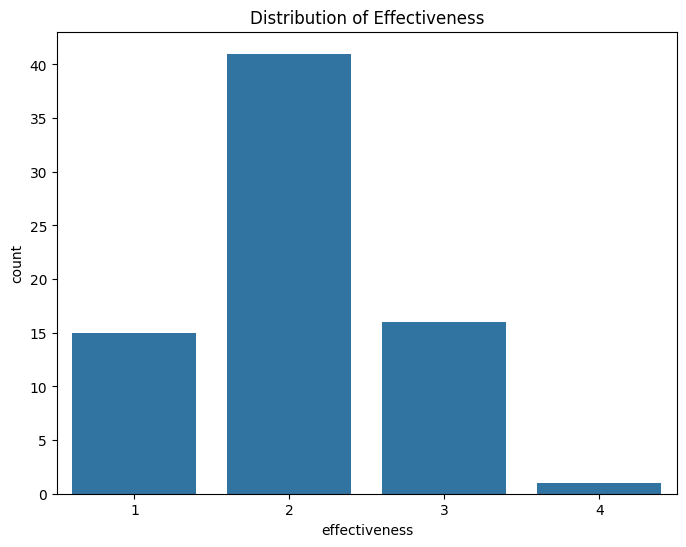

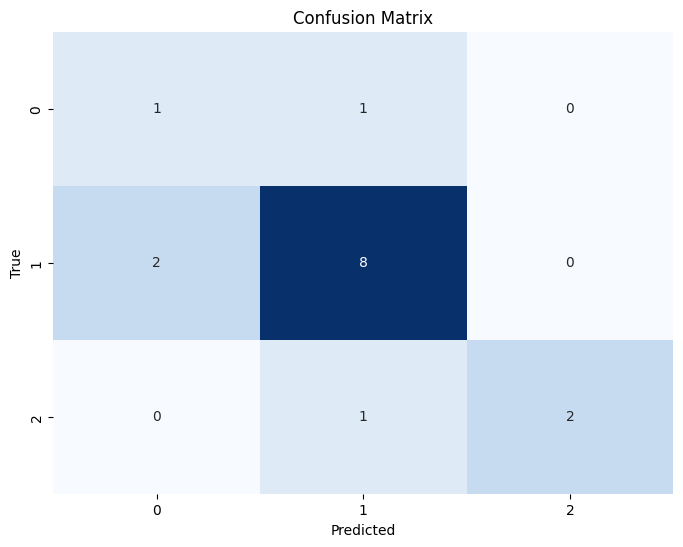

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='effectiveness', data=df)
plt.title('Distribution of Effectiveness')
plt.show()

# Visualize the confusion matrix for the model's predictions
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming you want to predict the 'style' column
X = df.drop('style', axis=1)
y = df['style']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Display actual vs predicted values for 'style'
results_df = pd.DataFrame({'Actual Style': y_test, 'Predicted Style': y_pred})
print(results_df)


Model Accuracy: 46.67%
    Actual Style  Predicted Style
4              2                2
63             3                3
18             3                1
0              2                3
28             3                3
72             1                1
10             3                3
34             3                3
12             1                3
55             1                3
65             1                2
31             2                3
9              3                1
45             2                3
5              3                3


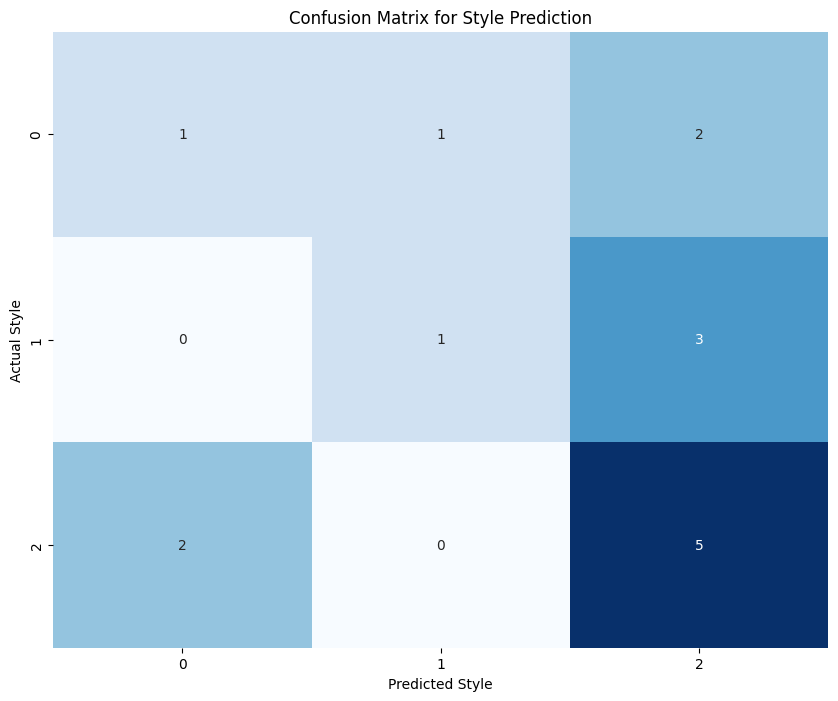

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.50      0.25      0.33         4
           3       0.50      0.71      0.59         7

    accuracy                           0.47        15
   macro avg       0.44      0.40      0.40        15
weighted avg       0.46      0.47      0.44        15



In [ ]:
from sklearn.metrics import classification_report

# Visualize the confusion matrix for the model's predictions
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Style')
plt.ylabel('Actual Style')
plt.title('Confusion Matrix for Style Prediction')
plt.show()

# Display the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))
